# Project Title: Crime Analysis and Prediction



# Importing Necessary Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df=pd.read_csv("Boston2018.csv")

In [3]:
df.head()

,_id,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,1,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,2,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,3,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,5,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98888 entries, 0 to 98887
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  98888 non-null  int64  
 1   INCIDENT_NUMBER      98888 non-null  object 
 2   OFFENSE_CODE         98888 non-null  int64  
 3   OFFENSE_CODE_GROUP   98888 non-null  object 
 4   OFFENSE_DESCRIPTION  98888 non-null  object 
 5   DISTRICT             98206 non-null  object 
 6   REPORTING_AREA       98888 non-null  object 
 7   SHOOTING             402 non-null    object 
 8   OCCURRED_ON_DATE     98888 non-null  object 
 9   YEAR                 98888 non-null  int64  
 10  MONTH                98888 non-null  int64  
 11  DAY_OF_WEEK          98888 non-null  object 
 12  HOUR                 98888 non-null  int64  
 13  UCR_PART             98868 non-null  object 
 14  STREET               97274 non-null  object 
 15  Lat                  92133 non-null 

In [5]:
df.describe()

,_id,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,98888.000000,98888.000000,98888.0,98888.000000,98888.000000,92133.000000,92133.000000
mean,49444.500000,2353.570949,2018.0,6.554789,13.046811,42.321937,-71.083059
std,28546.651047,1177.755377,0.0,3.360010,6.273042,0.031962,0.029647
min,1.000000,111.000000,2018.0,1.000000,0.000000,42.232413,-71.178674
25%,24722.750000,1102.000000,2018.0,4.000000,9.000000,42.297337,-71.097466
50%,49444.500000,3006.000000,2018.0,7.000000,14.000000,42.325559,-71.077782
75%,74166.250000,3201.000000,2018.0,9.000000,18.000000,42.348389,-71.062674
max,98888.000000,3831.000000,2018.0,12.000000,23.000000,42.395042,-70.995362


In [6]:
print(df.shape)
print("Any Duplicate Value:",df.duplicated().any())

(98888, 18)
Any Duplicate Value: False


# Handling Missing Values

In [7]:
df.isnull().sum()

_id                        0
INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 682
REPORTING_AREA             0
SHOOTING               98486
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  20
STREET                  1614
Lat                     6755
Long                    6755
Location                6755
dtype: int64

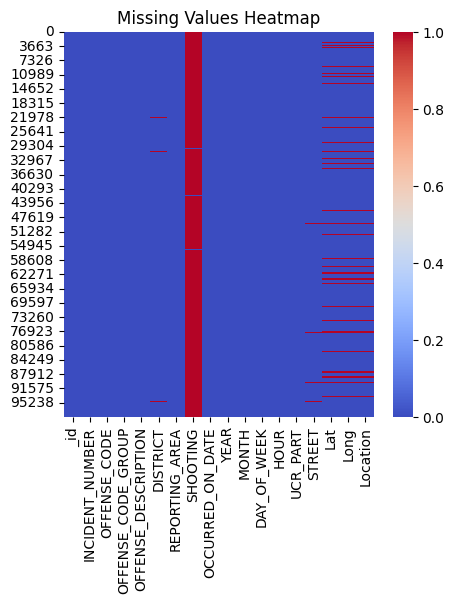

In [8]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
df.drop("SHOOTING", axis=1, inplace = True)

In [10]:
df.dropna(subset=['DISTRICT'], inplace=True)
df.dropna(subset=['STREET'], inplace=True)
df.dropna(subset=['Lat'], inplace=True)
df.dropna(subset=['Long'], inplace=True)
df.dropna(subset=['UCR_PART'], inplace=True)

In [11]:
df.isnull().sum()

_id                    0
INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [12]:
print("Shape of df after handling mssing values:",df.shape)

Shape of df after handling mssing values: (91472, 17)


# Plots

# Change in Crime over the Hour

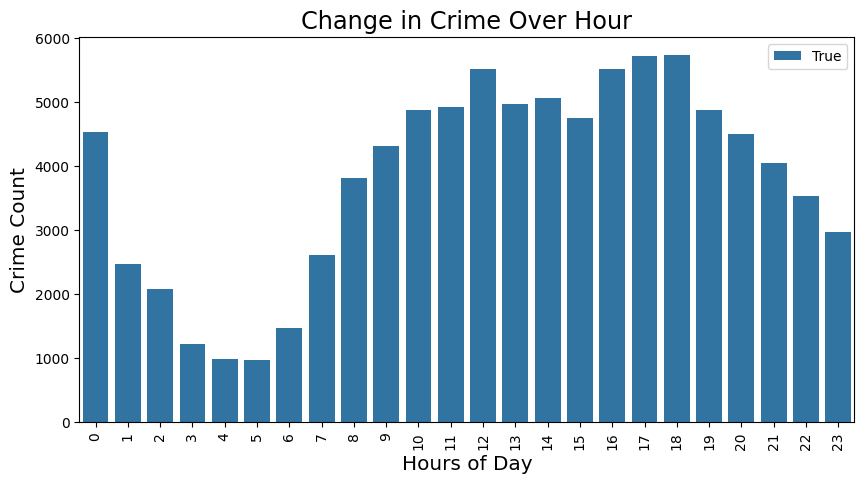

In [13]:
plt.figure(figsize=(10, 5))
hour_count = df['HOUR'].value_counts().reset_index()
hour_count.columns = ['HOUR', 'size']
sns.barplot(x='HOUR', y='size', data=hour_count)
plt.title('Change in Crime Over Hour', fontsize='xx-large')
plt.xlabel('Hours of Day', fontsize='x-large')
plt.ylabel('Crime Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.show()

# Change in Crime over the Week

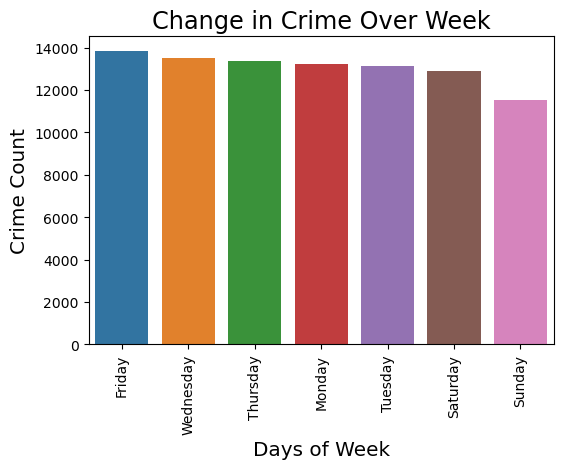

In [14]:
plt.figure(figsize=(6, 4))
hour_count = df['DAY_OF_WEEK'].value_counts().reset_index()
hour_count.columns = ['DAY_OF_WEEK', 'size']
sns.barplot(x='DAY_OF_WEEK', y='size', data=hour_count)
plt.title('Change in Crime Over Week', fontsize='xx-large')
plt.xlabel('Days of Week', fontsize='x-large')
plt.ylabel('Crime Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.show()

# Change in Crime over Month

In [15]:
counts = df['MONTH'].value_counts().reset_index()
counts.columns = ['MONTH', 'size']

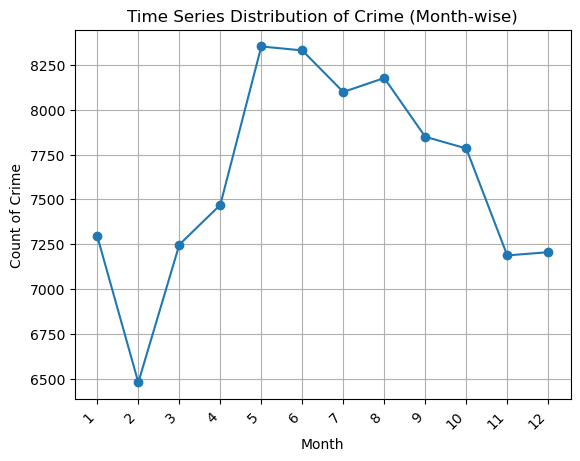

In [16]:
counts = df['MONTH'].value_counts().reset_index()
counts.columns = ['MONTH', 'size']
Month =counts.groupby(['MONTH'], as_index=False).agg({'size': 'sum'})
Month['MONTH'] = Month['MONTH'].astype(str) 
plt.grid(True)
plt.plot(Month['MONTH'], Month['size'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count of Crime')
plt.title('Time Series Distribution of Crime (Month-wise)')
plt.xticks(rotation=45, ha='right')  
plt.show()

# Crimes in Area

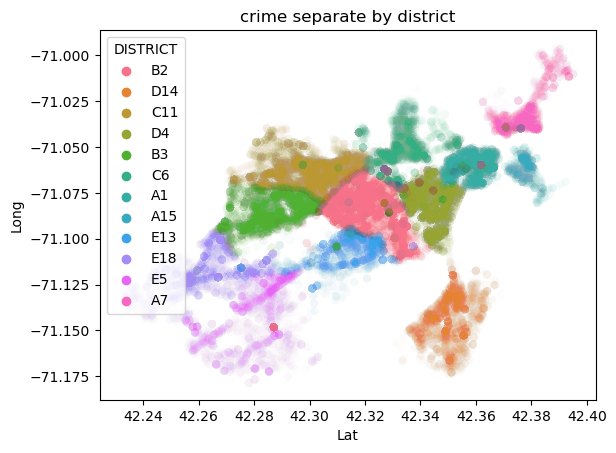

In [17]:
sns.scatterplot(x='Lat',y='Long',hue='DISTRICT',alpha = 0.01,data=df)
plt.title('crime separate by district')
plt.show()


# Area in Which Crime is Committed Most and Least

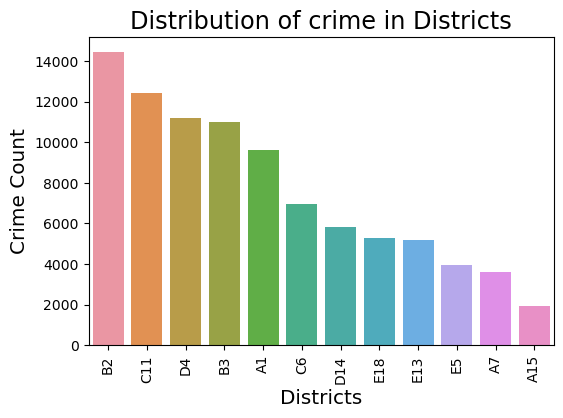

In [18]:
plt.figure(figsize=(6, 4))
area_count = df['DISTRICT'].value_counts().reset_index()
area_count.columns = ['DISTRICT', 'size']
sns.barplot(x='DISTRICT', y='size', data=area_count)
plt.title('Distribution of crime in Districts', fontsize='xx-large')
plt.xlabel('Districts', fontsize='x-large')
plt.ylabel('Crime Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.show()

# Highest Possibility of Crime being Committed

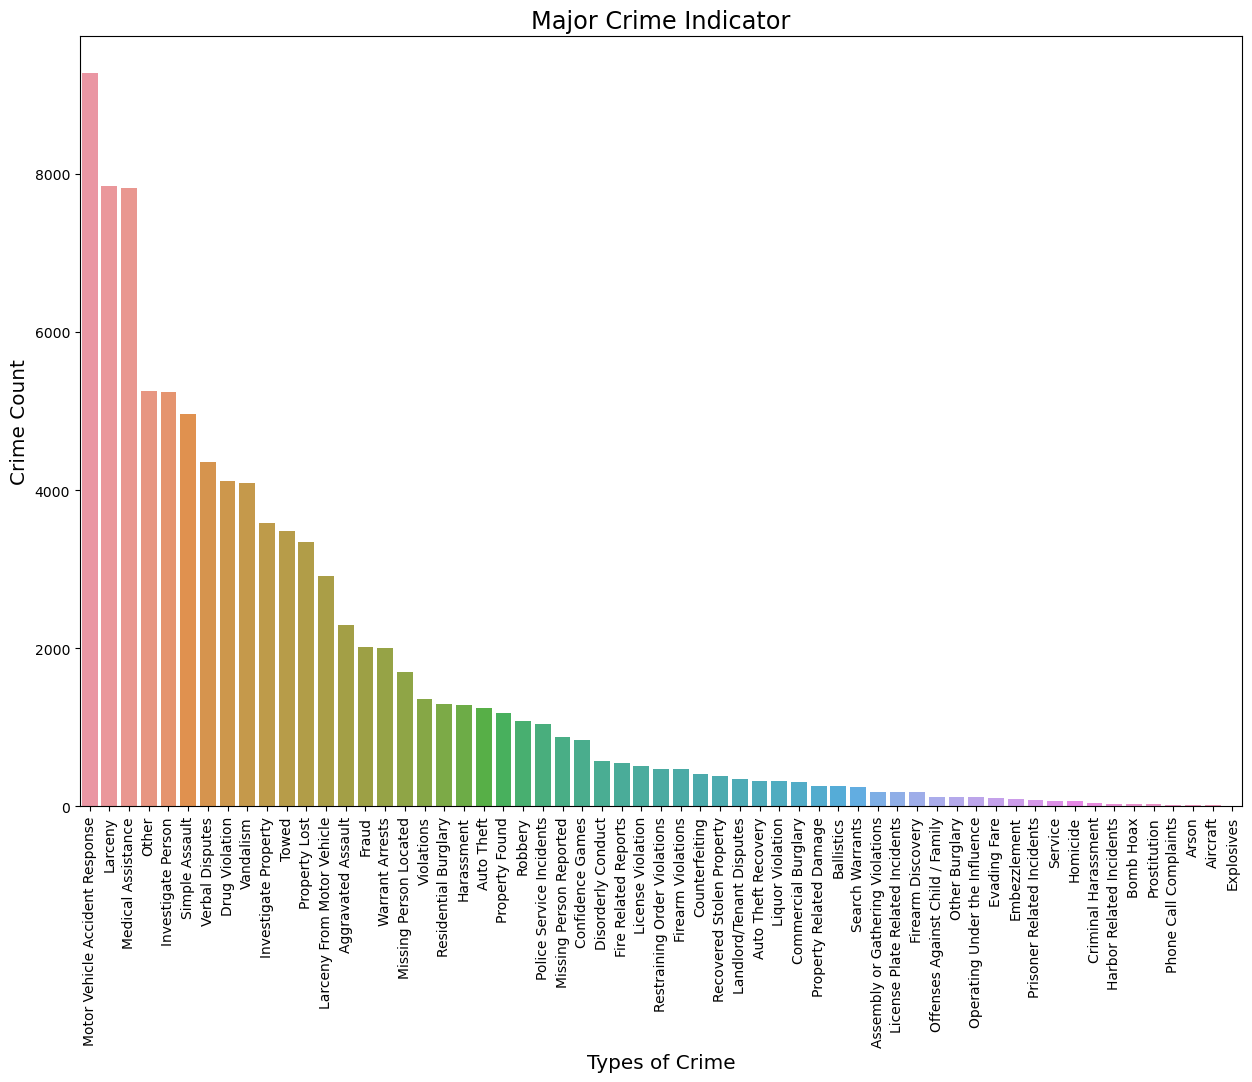

In [19]:
plt.figure(figsize=(15, 10))
offense_code_group_counts = df['OFFENSE_CODE_GROUP'].value_counts().reset_index()
offense_code_group_counts.columns = ['OFFENSE_CODE_GROUP', 'size']
sns.barplot(x='OFFENSE_CODE_GROUP', y='size', data=offense_code_group_counts.sort_values(by='size', ascending=False))
plt.title('Major Crime Indicator', fontsize='xx-large')
plt.xlabel('Types of Crime', fontsize='x-large')
plt.ylabel('Crime Count', fontsize='x-large')
plt.xticks(rotation=90)

plt.show()

In [20]:
larceny=df[df.OFFENSE_CODE_GROUP == 'Larceny'].groupby('OFFENSE_DESCRIPTION', as_index=False).size()
Motor= df[df.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'].groupby('OFFENSE_DESCRIPTION', as_index=False).size()
other_types = df[df.OFFENSE_CODE_GROUP == 'Other'].groupby('OFFENSE_DESCRIPTION', as_index=False).size()
medical_assistance=df[df.OFFENSE_CODE_GROUP == 'Medical Assistance'].groupby('OFFENSE_DESCRIPTION', as_index=False).size()

In [21]:
Motor

,OFFENSE_DESCRIPTION,size
0,M/V - LEAVING SCENE - PERSONAL INJURY,322
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,4346
2,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,177
3,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY,76
4,M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY,102
5,M/V ACCIDENT - OTHER,824
6,M/V ACCIDENT - OTHER CITY VEHICLE,170
7,M/V ACCIDENT - PERSONAL INJURY,1026
8,M/V ACCIDENT - POLICE VEHICLE,173
9,M/V ACCIDENT - PROPERTY DAMAGE,1709


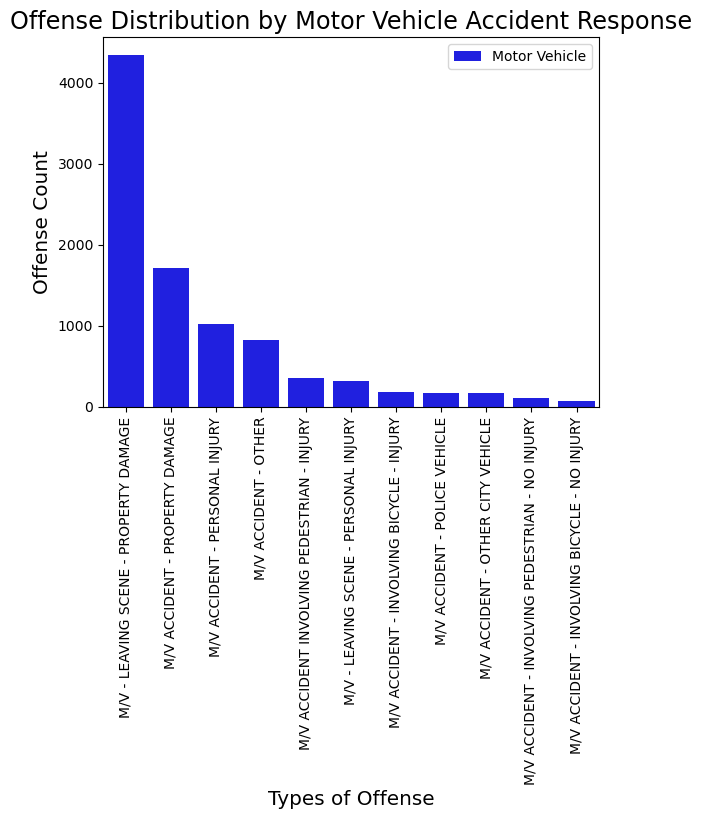

In [22]:
sns.barplot(x='OFFENSE_DESCRIPTION', y='size', data=Motor.sort_values(by='size', ascending=False), label='Motor Vehicle', color='blue')
plt.title('Offense Distribution by Motor Vehicle Accident Response', fontsize='xx-large')
plt.xlabel('Types of Offense', fontsize='x-large')
plt.ylabel('Offense Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [23]:
other_types

,OFFENSE_DESCRIPTION,size
0,ABDUCTION - INTICING,3
1,ANIMAL ABUSE,20
2,DANGEROUS OR HAZARDOUS CONDITION,86
3,EXTORTION OR BLACKMAIL,61
4,INTIMIDATING WITNESS,90
5,INVESTIGATION FOR ANOTHER AGENCY,59
6,KIDNAPPING - ENTICING OR ATTEMPTED,15
7,KIDNAPPING/CUSTODIAL KIDNAPPING,13
8,OBSCENE MATERIALS - PORNOGRAPHY,62
9,OTHER OFFENSE,170


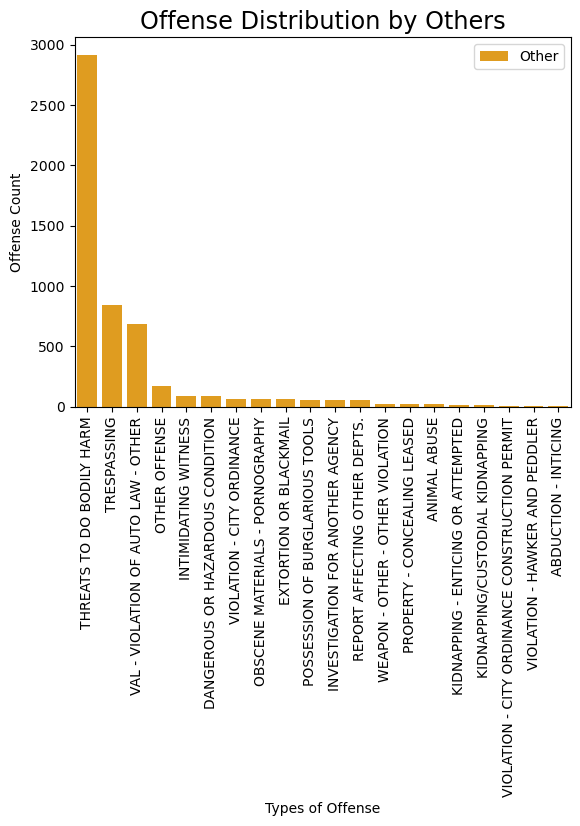

In [24]:
sns.barplot(x='OFFENSE_DESCRIPTION', y='size', data=other_types.sort_values(by='size', ascending=False), label='Other', color='orange')
plt.title('Offense Distribution by Others', fontsize='xx-large')
plt.xlabel('Types of Offense')
plt.ylabel('Offense Count')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [25]:
larceny

,OFFENSE_DESCRIPTION,size
0,LARCENY ALL OTHERS,1787
1,LARCENY IN A BUILDING UNDER $50,3
2,LARCENY PICK-POCKET,104
3,LARCENY PURSE SNATCH - NO FORCE,39
4,LARCENY SHOPLIFTING,2636
5,LARCENY THEFT FROM BUILDING,2646
6,LARCENY THEFT FROM COIN-OP MACHINE,5
7,LARCENY THEFT OF BICYCLE,621


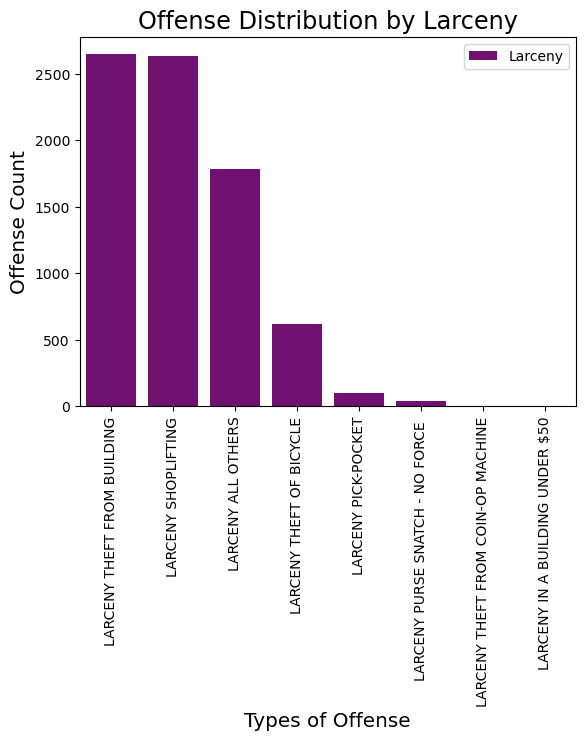

In [26]:
sns.barplot(x='OFFENSE_DESCRIPTION', y='size', data=larceny.sort_values(by='size', ascending=False), label='Larceny', color='purple')
plt.title('Offense Distribution by Larceny', fontsize='xx-large')
plt.xlabel('Types of Offense', fontsize='x-large')
plt.ylabel('Offense Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [27]:
medical_assistance

,OFFENSE_DESCRIPTION,size
0,ANIMAL CONTROL - DOG BITES - ETC.,96
1,DEATH INVESTIGATION,335
2,FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH,2
3,INJURY BICYCLE NO M/V INVOLVED,8
4,SICK/INJURED/MEDICAL - PERSON,6442
5,SICK/INJURED/MEDICAL - POLICE,398
6,SUDDEN DEATH,439
7,SUICIDE / SUICIDE ATTEMPT,106


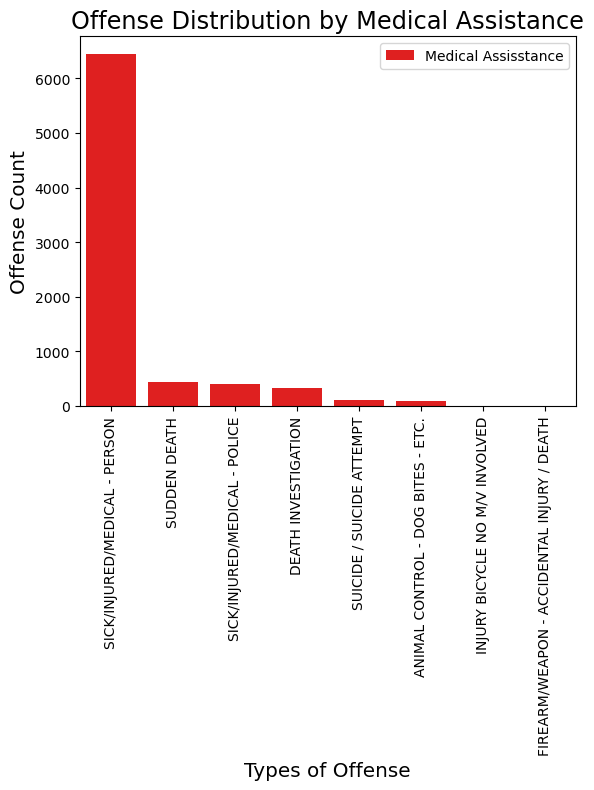

In [28]:
sns.barplot(x='OFFENSE_DESCRIPTION', y='size', data=medical_assistance.sort_values(by='size', ascending=False), label='Medical Assisstance', color='red')
plt.title('Offense Distribution by Medical Assistance', fontsize='xx-large')
plt.xlabel('Types of Offense', fontsize='x-large')
plt.ylabel('Offense Count', fontsize='x-large')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Timestamp Pre-processing

In [17]:
# Convert 'OCCURRED_ON_DATE' to datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

# Extract the date part
df['OCCURRED_ONLY_DATE'] = df['OCCURRED_ON_DATE'].dt.date

# Extract the day of the month
df['OCCURRED_ON_DAY'] = df['OCCURRED_ON_DATE'].dt.day

# Extract the day of the year
df['OCCURRED_ON_DAY_OF_YEAR'] = df['OCCURRED_ON_DATE'].dt.dayofyear


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91472 entries, 0 to 98887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      91472 non-null  int64         
 1   INCIDENT_NUMBER          91472 non-null  object        
 2   OFFENSE_CODE             91472 non-null  int64         
 3   OFFENSE_CODE_GROUP       91472 non-null  object        
 4   OFFENSE_DESCRIPTION      91472 non-null  object        
 5   DISTRICT                 91472 non-null  object        
 6   REPORTING_AREA           91472 non-null  object        
 7   OCCURRED_ON_DATE         91472 non-null  datetime64[ns]
 8   YEAR                     91472 non-null  int64         
 9   MONTH                    91472 non-null  int64         
 10  DAY_OF_WEEK              91472 non-null  object        
 11  HOUR                     91472 non-null  int64         
 12  UCR_PART                 91472 non-nu

In [19]:
object_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each object column
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting Data into Train and Test Data

In [20]:
x = df.drop(['UCR_PART','DISTRICT', 'REPORTING_AREA', 'Location', 'OCCURRED_ON_DATE', 'INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'STREET'],axis=1)

In [21]:
y=df['UCR_PART']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
X_train

,_id,OFFENSE_CODE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,OCCURRED_ONLY_DATE,OCCURRED_ON_DAY,OCCURRED_ON_DAY_OF_YEAR
33111,33112,3006,2018,5,5,20,42.265632,-71.110517,127,8,128
3113,3114,1402,2018,1,2,2,42.267669,-71.111609,12,13,13
20742,20743,3114,2018,3,2,14,42.319171,-71.091924,82,24,83
38958,38959,3410,2018,5,5,9,42.326358,-71.078863,148,29,149
82568,82569,724,2018,10,3,17,42.352249,-71.083444,300,28,301
...,...,...,...,...,...,...,...,...,...,...,...
6751,6752,3115,2018,1,2,17,42.354220,-71.056278,26,27,27
59368,59369,706,2018,8,5,9,42.337969,-71.064082,218,7,219
83194,83195,614,2018,10,6,9,42.339273,-71.074098,303,31,304
928,929,3114,2018,1,4,19,42.273481,-71.074760,3,4,4


In [24]:
X_test

,_id,OFFENSE_CODE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,OCCURRED_ONLY_DATE,OCCURRED_ON_DAY,OCCURRED_ON_DAY_OF_YEAR
10133,10134,413,2018,2,2,4,42.314337,-71.101515,40,10,41
21770,21771,3115,2018,3,6,13,42.257841,-71.148139,86,28,87
38137,38138,3502,2018,5,2,4,42.306493,-71.081807,145,26,146
44946,44947,3006,2018,6,1,7,42.299411,-71.115175,168,18,169
21119,21120,2647,2018,3,1,6,42.376796,-71.037897,84,26,85
...,...,...,...,...,...,...,...,...,...,...,...
57827,57828,2610,2018,8,6,18,42.328741,-71.087716,212,1,213
6300,6301,802,2018,1,0,2,42.335119,-71.074917,25,26,26
10258,10259,3831,2018,2,2,16,42.336112,-71.046654,40,10,41
36289,36290,301,2018,5,3,0,42.303871,-71.070485,139,20,140


In [25]:
y_train

33111    2
3113     3
20742    2
38958    2
82568    1
        ..
6751     2
59368    1
83194    1
928      2
17026    3
Name: UCR_PART, Length: 73177, dtype: int32

In [26]:
y_test

10133    1
21770    2
38137    2
44946    2
21119    3
        ..
57827    3
6300     3
10258    2
36289    1
22759    2
Name: UCR_PART, Length: 18295, dtype: int32

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. Implementing KKN regressor to predict UCR_Part Severity

In [49]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the model on the training data
knn_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.02023017825149555
R-squared: 0.9190676900025301
Mean Absolute Error: 0.037004646078163436


In [50]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

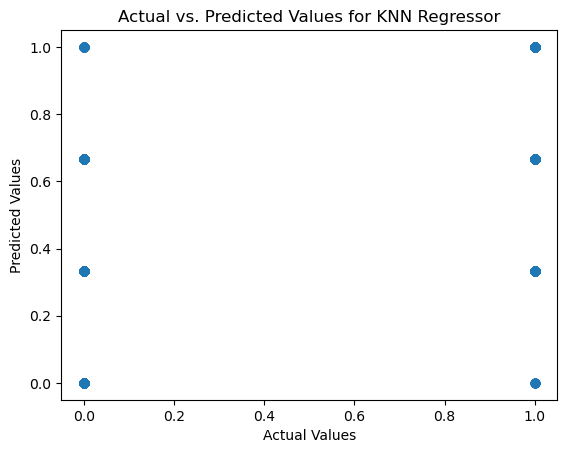

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for KNN Regressor")
plt.show()

# Comparison of y_pred and and actual data

In [52]:
df2 = pd.DataFrame({ 'Actual_Test': y_test, 'Predicted': y_pred})
df2.head(100)

,Actual_Test,Predicted
10133,0,0.000000
21770,0,0.000000
38137,0,0.000000
44946,0,0.000000
21119,0,0.000000
...,...,...
44080,0,0.000000
9327,0,0.000000
18997,0,0.000000
22322,0,0.000000


# 2. Linear Regression:

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the model
lin_regressor = LinearRegression()

# Fit the model on the training data
lin_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lin = lin_regressor.predict(X_test)

# Evaluate the performance
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f'Linear Regression - Mean Squared Error: {mse_lin}')
print(f'Linear Regression - R-squared: {r2_lin}')
print(f'Linear Regression - Mean Absolute Error: {mae_lin}')




Linear Regression - Mean Squared Error: 0.46852277502780054
Linear Regression - R-squared: 0.04363536107739652
Linear Regression - Mean Absolute Error: 0.5748683202741945


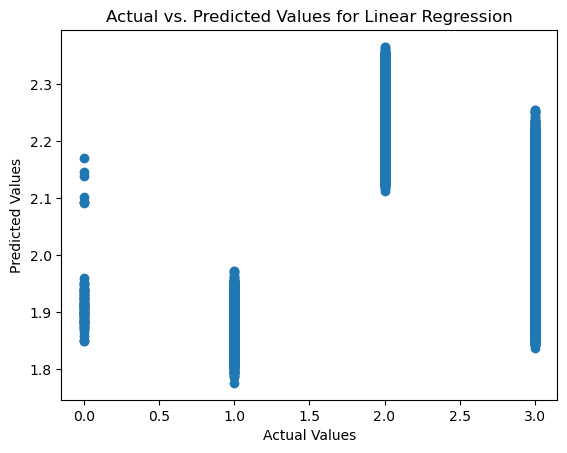

In [35]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.show()



In [37]:

# Create a DataFrame for comparison
df_lin = pd.DataFrame({'Actual_Test': y_test, 'Predicted': y_pred_lin})
df_lin.head(100)

,Actual_Test,Predicted
10133,1,1.890480
21770,2,2.249198
38137,2,2.264377
44946,2,2.198004
21119,3,2.108322
...,...,...
44080,2,2.294363
9327,3,2.143652
18997,2,2.172209
22322,3,2.108849


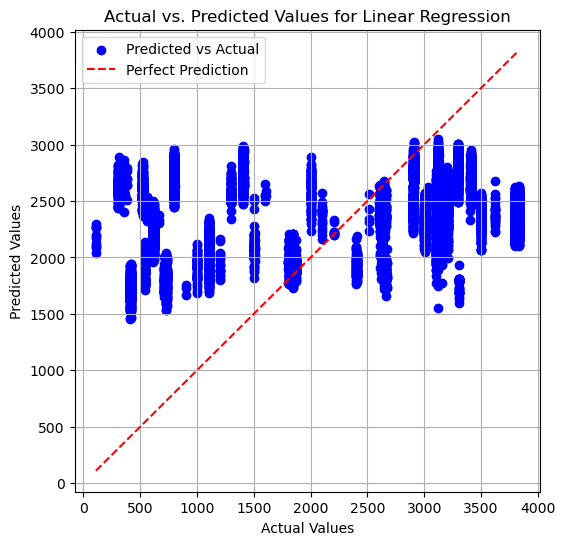

,Actual_Test,Predicted
75129,613,2146.864170
12493,522,2580.901010
15740,619,2198.447371
271,3006,2336.479101
68451,1402,2720.627042
...,...,...
40837,3831,2325.546398
90578,3802,2449.157074
40181,724,1850.484075
46731,1402,2780.169013


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
lin_regressor = LinearRegression()

# Fit the model on the training data
lin_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lin = lin_regressor.predict(X_test)


# Plot the actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame for comparison of actual and predicted values
df_lin = pd.DataFrame({'Actual_Test': y_test, 'Predicted': y_pred_lin})

# Display the first 100 rows of the DataFrame
df_lin.head(100)


# 3. Decision Tree :

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_regressor = DecisionTreeRegressor()

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R-squared: {r2_dt}')
print(f'Decision Tree - Mean Absolute Error: {mae_dt}')




Decision Tree - Mean Squared Error: 0.0
Decision Tree - R-squared: 1.0
Decision Tree - Mean Absolute Error: 0.0


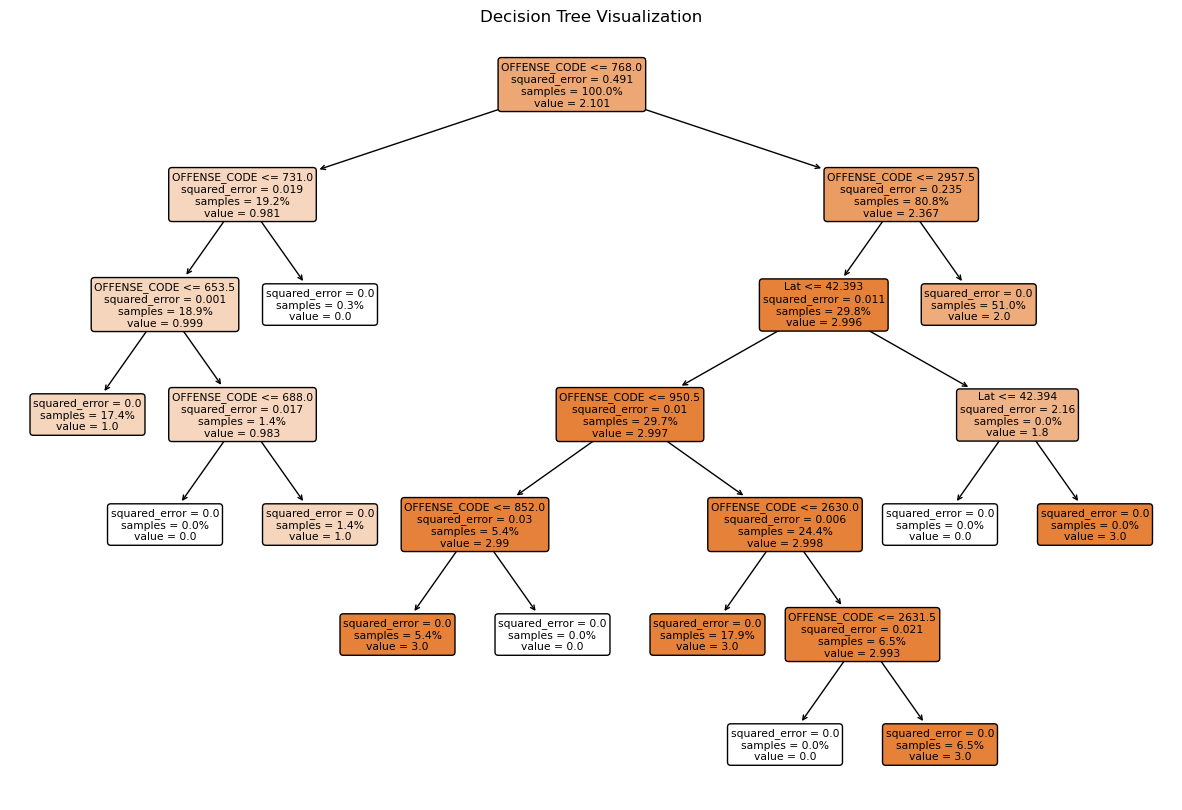

In [34]:
from sklearn.tree import plot_tree

# Convert feature names to a list
feature_names = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(15, 10))  # You can adjust the size as needed
plot_tree(dt_regressor, filled=True, feature_names=feature_names, 
          rounded=True, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()


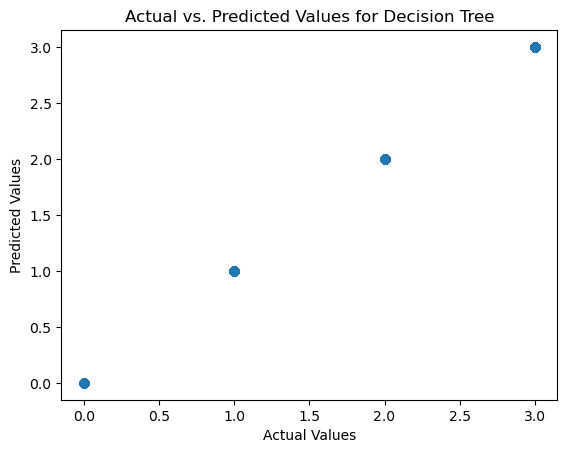

In [38]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Decision Tree")
plt.show()



In [39]:
# Create a DataFrame for comparison
df_dt = pd.DataFrame({'Actual_Test': y_test, 'Predicted': y_pred_dt})
df_dt.head(100)

,Actual_Test,Predicted
10133,1,1.0
21770,2,2.0
38137,2,2.0
44946,2,2.0
21119,3,3.0
...,...,...
44080,2,2.0
9327,3,3.0
18997,2,2.0
22322,3,3.0


# 4. K MEANS:

In [42]:
from sklearn.cluster import KMeans

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model on the full PCA-transformed data (79094 samples)
y_pred_kmeans = kmeans.fit_predict(X_train_pca)

# Now y_pred_kmeans should have the same number of samples as X_train_pca (79094)
print(f"Shape of y_pred_kmeans: {y_pred_kmeans.shape}")


Shape of y_pred_kmeans: (79094,)


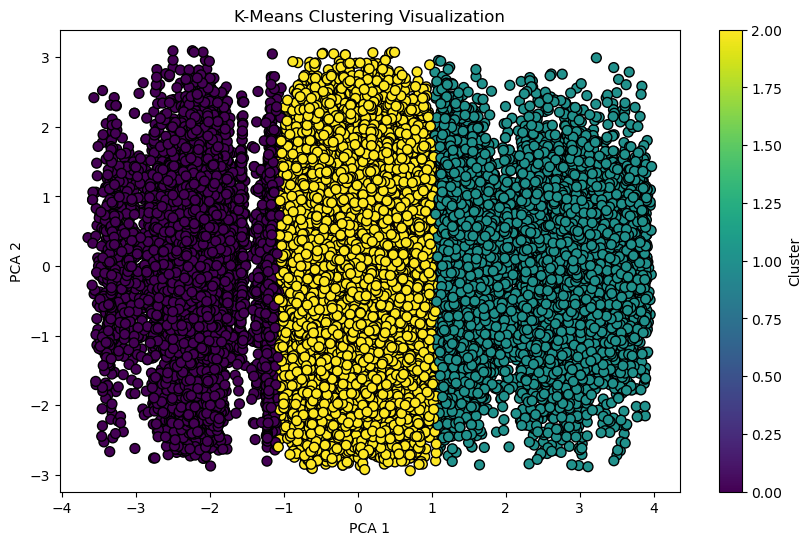

In [43]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred_kmeans, cmap='viridis', edgecolors='k', s=50)
plt.title("K-Means Clustering Visualization")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')  # Adding a colorbar to show the cluster labels
plt.show()


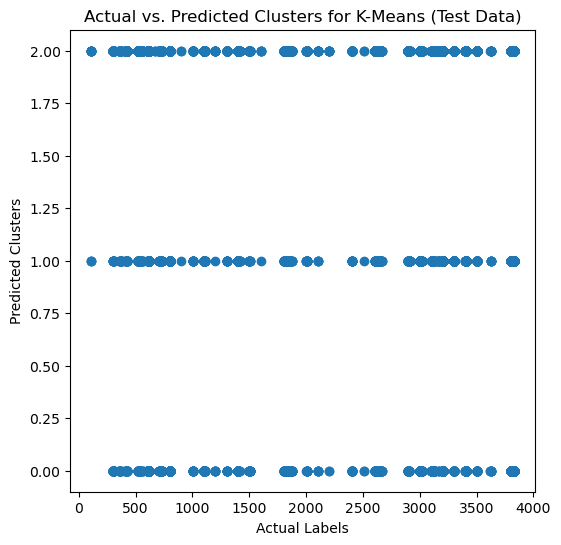

In [47]:
# Assuming X_test_pca is the PCA-transformed test data
y_pred_kmeans_test = kmeans.predict(X_test_pca)

# Now you can plot the actual vs predicted values for the test data
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_kmeans_test)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Clusters")
plt.title("Actual vs. Predicted Clusters for K-Means (Test Data)")
plt.show()


In [49]:
# Get predicted clusters for the test data (X_test_pca)
y_pred_kmeans_test = kmeans.predict(X_test_pca)

# Create a DataFrame for comparison of actual and predicted clusters for the test set
df_kmeans = pd.DataFrame({'Actual_Labels': y_test, 'Predicted_Clusters': y_pred_kmeans_test})

# Display the first 100 rows for comparison
df_kmeans.head(100)


,Actual_Labels,Predicted_Clusters
75129,613,0
12493,522,2
15740,619,2
271,3006,2
68451,1402,2
...,...,...
40837,3831,2
90578,3802,2
40181,724,2
46731,1402,2


# 5. NAive BAise classification:

In [30]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

# 1. Classification Report
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))



Naive Bayes Classification Report:

              precision    recall  f1-score   support

         111       1.00      1.00      1.00        12
         301       0.64      0.97      0.77       147
         311       0.29      0.11      0.15        38
         351       0.00      0.00      0.00         9
         361       0.25      0.03      0.05        39
         371       0.00      0.00      0.00         4
         381       0.00      0.00      0.00         7
         413       0.62      1.00      0.76       299
         423       0.00      0.00      0.00       184
         520       0.54      0.23      0.33       124
         521       0.00      0.00      0.00        35
         522       0.42      0.83      0.56       110
         540       0.67      0.78      0.72        50
         541       0.00      0.00      0.00         5
         542       0.29      0.25      0.27        20
         560       0.58      0.65      0.61        17
         561       0.00      0.00      0.00  

In [31]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm)
cm.head(100)

Confusion Matrix:
 [[  12    0    0 ...    0    0    0]
 [   0  143    3 ...    0    0    0]
 [   0   33    4 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0   32]
 [   0    0    0 ...    0    0   78]
 [   0    0    0 ...    0    0 1004]]


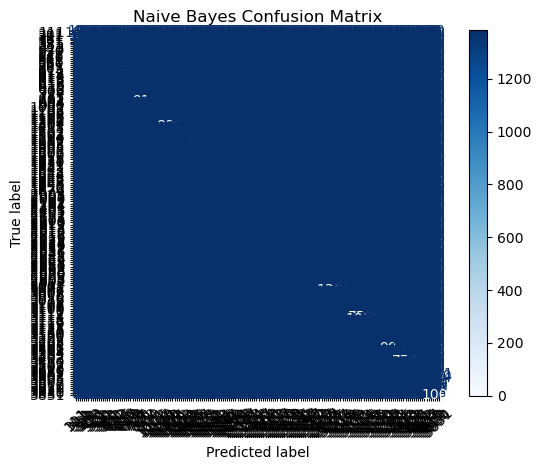

In [33]:
# 3. Visualize Confusion Matrix with fixed label set
labels = np.unique(np.concatenate((y_test, y_pred_nb)))  # all labels from both true and predicted
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.show()

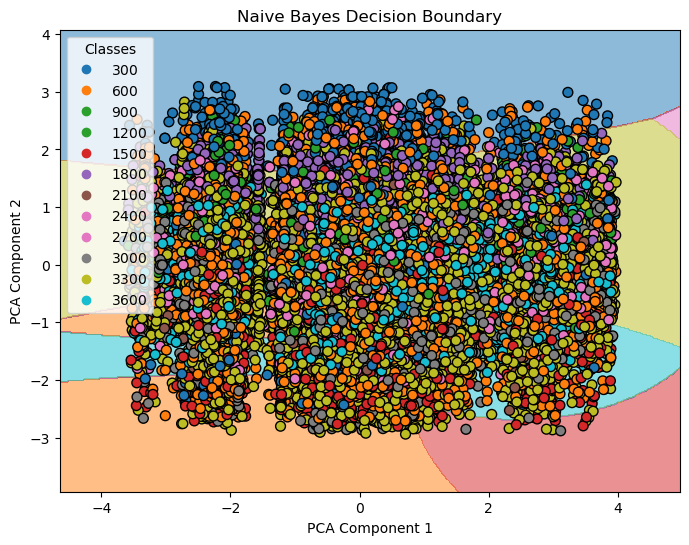

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Assuming 'X_train_pca' is your PCA-transformed data and 'y_train' is your target labels
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# Create a color map for the classes
cmap = ListedColormap(plt.cm.get_cmap("tab10").colors[:len(np.unique(y_train))])

# Step 1: Create the mesh grid covering the 2D PCA space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
X1, X2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Step 2: Get model predictions for each point in the grid
Z = nb.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

# Step 3: Plot the decision boundary
plt.figure(figsize=(8,6))
plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)  # Decision boundary visualization

# Step 4: Plot the actual data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap, edgecolors='k', s=50)

# Step 5: Add labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Naive Bayes Decision Boundary')

# Create a legend with the correct class names
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Classes")

plt.show()


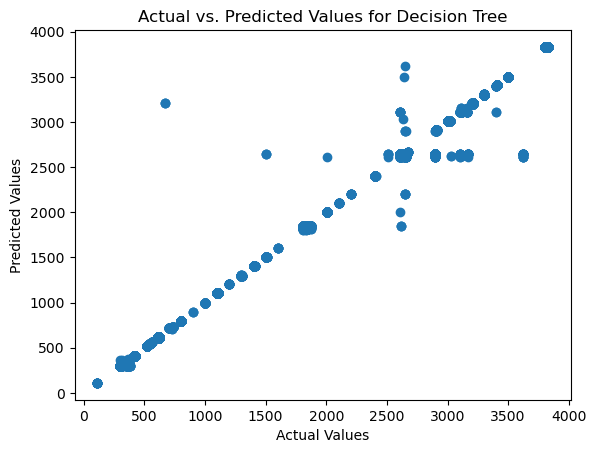

In [62]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_nb)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Decision Tree")
plt.show()



In [61]:
import pandas as pd

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_nb
})

# Display first 100 rows
print("\nComparison of Actual vs Predicted Labels:")
print(comparison_df.head(100))



Comparison of Actual vs Predicted Labels:
       Actual  Predicted
75129     613        617
12493     522        522
15740     619        613
271      3006       3006
68451    1402       1402
...       ...        ...
40837    3831       3831
90578    3802       3831
40181     724        724
46731    1402       1402
74013    3115       3115

[100 rows x 2 columns]


# Report:

# Introduction

Crimes significantly impact a society's economic development and standard of living, influencing people's decisions to relocate and travel. Law enforcement organizations are utilizing data mining techniques and advanced geographic information systems to improve crime analytics and protect communities. Criminals often target familiar locations, hence, the goal of this project is to utilize machine learning and data mining techniques to help identify hotspots and the type, location, and time of crimes committed. The goal is to increase public awareness and improve crime analytics to protect communities and reduce crime rates.
This solution can help police forces increase crime prediction and prevention by distributing resources efficiently at most likely crime locations. This information can save lives and improve the safety of the community for both residents and travelers. By having this information available, the police can better allocate resources and ensure a safer environment for all.
# EDA:
For understanding the structure and attributes of the dataset, an exploratory data analysis (EDA)was performed out before diving into the main goals. We checked for datatypes, missing values to avoid deviation in result.
# Data Transformation:
We made several changes in data before performing analysis.For the missing values we dropped the rows with missing value and updated the data set.We converted categorical column to numerical using label encoder.We also preprocessed timestamp column to avoid any error while creating model due to string values.

# Data Analysis
# Change of Crime over the Months and Peak month for crimes:
We used count function to calculate the count of crimes over month the grouped data using month column on the basis of count.Then we used simple line plot to show change of crime over month.From the line plot we can see the most crime occur on June and least in febuary.
# Change of Crime over Hour:
We used count function to calculate count of crimes over hour.Then used bar plot to visualize data from which we can tell the peak period for criminal activities are 18:00(6:00 pm) and least crimes are comnmitted at 5:00 am .
# Change of Crime over Week:
We used count function to calculate count of crimes over days of week.Then used barplot to visualize data from which we can tell the peak day for criminal activities id Friday and least crimes are committed at Sunday.
# Area with Most Crimes:
We used count function to calculate count of crimes in Districts.Then we used barplot to show District with most crimes and least crime.From the barplot the area with most crimes is B2 District and least crime is A15. 
# Highest Possibility of crime being committed:
We used count function to calculate count of crimes based on offense code group. Then we grouped offense group code and offense description on basis of count to see which crime is committed most. We found Motor Vehicle Accident response is most likely to occur. We also created bar plots to see which category of most likely to occur crime has most cases to be reported. For Motor Vehicle Accident response M/V - LEAVING SCENE - PROPERTY DAMAGE is most likely to occur.

# Model Analysis

Data Processing:
Main data set is loaded. We checked for missing values. For the missing values we drooped the rows with missingvalue and updated the data set.We converted categorical column to numerical using label encoder.We also preprocessed timestampl column to avoid any error while creating model due to string values.

Data Splitting: 
Main dataset was split into training and testing test sets for KNN regressor and Random Forest Regression analysis to ensure that the model was trained on a substantial portion of the data and evaluated on a unseen subset.

Model Fitting:
KNregressor and Random Forest Regression model was chosen to predict severity of UCR_parto. Then fit the model to the train data to make predictions on the test set and evaluated the model using MSE,MAE and R2 scores.

New Dataframe:
To compare actual test data from predicted data we made new dataframe display actual and predictiong value which on comparison showed that both of our models are highly accurate.

# Discussion
# Model:
KNN Regressor and Random Forest Regresssion model was trained and achieved high accuracy, making it a valuable tool for predicting severity of UCR_part. The model's performance was evaluated using following methods:Metrics MSE,MEA and R2 scores
# Visulization: 
Scatter plot compared actual value to predicted value,showing any anomalies in the data and model
# Comparison Table:
New dataframe was created to show actual value with predicted value to show accuracy of model for both KNN-regressor and Random Forest Regression

# Conclusion
This project provided insights into crime types, hotspots, peak periods which can be seen in visualization part . Both of our models are highly accurate in predicting severity of crime based on features selected. Hence, we can reach our goal to increase public awareness and improve crime analytics to protect communities and reduce crime rates. This solution can help police forces increase crime prediction and prevention by distributing resources efficiently at most likely crime locations. This information can save lives and improve the safety of the community for both residents and travelers. 